<center><h1>Singaravelou_Ritika_HW2</h1></center>
<br>
<br>

Name: Ritika Singaravelou
<br>
Github Username: ritika-singaravelou
<br>
USC ID: 6144091011

## 1. Combined Cycle Power Plant Data Set


The dataset contains data points collected from a Combined Cycle Power Plant over
6 years (2006-2011), when the power plant was set to work with full load. Features
consist of hourly average ambient variables Temperature (T), Ambient Pressure (AP),
Relative Humidity (RH) and Exhaust Vacuum (V) to predict the net hourly electrical
energy output (PE) of the plant.


### Import required packages

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
!pip install tabulate
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error
import math
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from tabulate import tabulate
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import normalize
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import euclidean_distances


[notice] A new release of pip available: 22.3 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### (a) Download Data

#### Download the Combined Cycle Power Plant data from:
https://archive.ics.uci.edu/ml/datasets/Combined+Cycle+Power+Plant


Get the Cycle Power Plant Data Set

In [2]:
ccpp_df = pd.read_excel('../data/CCPP/Folds5x2_pp.xlsx')
ccpp_df

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


### (b) Exploring the data

### i. How many rows are in this data set? How many columns? What do the rows and columns represent?

In [3]:
print("Number of rows : "+str(ccpp_df.shape[0]))

Number of rows : 9568


In [4]:
print("Number of columns : "+str(ccpp_df.shape[1]))

Number of columns : 5


In [5]:
cols=ccpp_df.columns
cols

Index(['AT', 'V', 'AP', 'RH', 'PE'], dtype='object')

### Number of rows in the given dataset = 9568

### Number of columns in the given dataset = 5  ('AT', 'V', 'AP', 'RH', 'PE')



### The dataset contains 9568 data points (represented by the rows) collected from a Combined Cycle Power Plant over 6 years. The features (predictors) include the following hourly average ambient variables: Ambient Temperature (AT), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V). The goal is to predict the net hourly electrical energy output (PE)  of the plant. The columns include the four features, AT, AP, RH, V and the response (PE).

### ii. Make pairwise scatterplots of all the variables in the data set including the predictors (independent variables) with the dependent variable. Describe your findings.

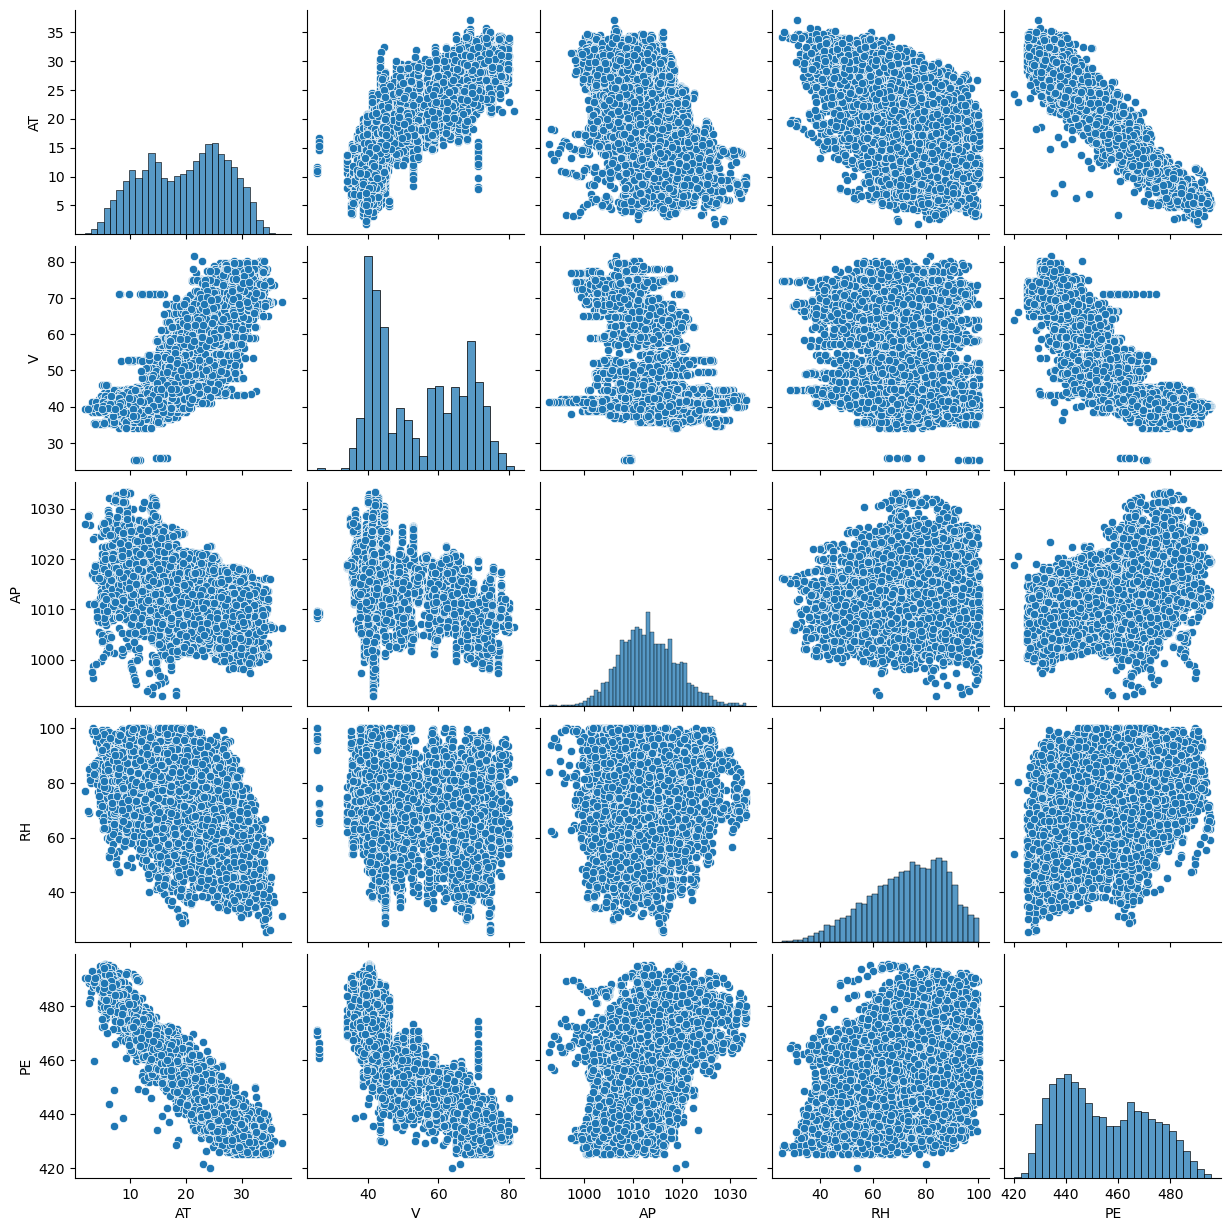

In [6]:
sns.pairplot(data = ccpp_df)

## Findings : 

#### We observe the following from the above pairwise scatterplots:
### * Temperature (AT) is positively correlated with Exhaust Vacuum (V)
### * Temperature (AT) is negatively correlated with Electrical Energy Output (PE)
### * Exhaust Vacuum (V) is negatively correlated with Electrical Energy Output (PE)


### iii. What are the mean, the median, range, first and third quartiles, and interquartile ranges of each of the variables in the dataset? Summarize them in a table.

In [7]:
mean_of_cols=[]
median_of_cols=[]
range_of_cols=[]
first_quartile_of_cols=[]
third_quartile_of_cols=[]
interquartile_of_cols=[]
cols=ccpp_df.columns

for i in range(len(cols)):
    mean_of_cols.append(np.mean(ccpp_df[cols[i]]))
    median_of_cols.append(np.median(ccpp_df[cols[i]]))
    range_of_cols.append(np.max(ccpp_df[cols[i]])-np.min(ccpp_df[cols[i]]))
    first_quartile_of_cols.append(np.quantile(ccpp_df[cols[i]],0.25))
    third_quartile_of_cols.append(np.quantile(ccpp_df[cols[i]],0.75))
    interquartile_of_cols.append(third_quartile_of_cols[i]-first_quartile_of_cols[i])
    
summary_dict={"Variable" : cols,"Mean" : mean_of_cols,"Median" : median_of_cols, "Range" : range_of_cols, "First Quartile" : first_quartile_of_cols, "Third Quartile" : third_quartile_of_cols, "Interquartile Range" : interquartile_of_cols }
summary_table=pd.DataFrame(summary_dict)
print(tabulate(summary_table, headers='keys', tablefmt='grid',showindex=False))
    
    

+------------+-----------+----------+---------+------------------+------------------+-----------------------+
| Variable   |      Mean |   Median |   Range |   First Quartile |   Third Quartile |   Interquartile Range |
+============+===========+==========+=========+==================+==================+=======================+
| AT         |   19.6512 |   20.345 |   35.3  |          13.51   |            25.72 |               12.21   |
+------------+-----------+----------+---------+------------------+------------------+-----------------------+
| V          |   54.3058 |   52.08  |   56.2  |          41.74   |            66.54 |               24.8    |
+------------+-----------+----------+---------+------------------+------------------+-----------------------+
| AP         | 1013.26   | 1012.94  |   40.41 |        1009.1    |          1017.26 |                8.16   |
+------------+-----------+----------+---------+------------------+------------------+-----------------------+
| RH      

### (c) Simple Linear Regression

####  For each predictor, fit a simple linear regression model to predict the response. Describe your results. In which of the models is there a statistically significant association between the predictor and the response? Create some plots to back up your assertions. Are there any outliers that you would like to remove from your data for each of these regression tasks?

In [8]:
single_regression_coef=[]

For predictor AT
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        23:02:49   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -2.1713      0.007   

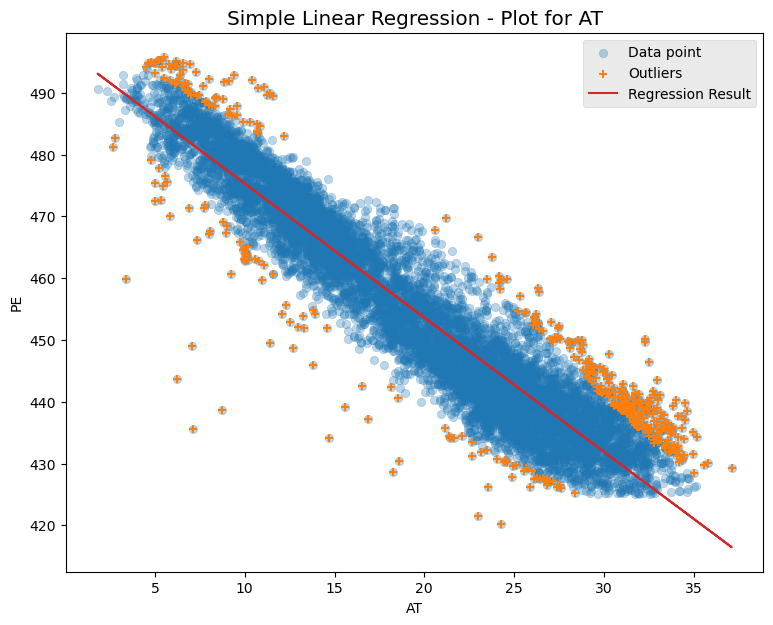


There are 416 outliers
        AT      PE
0     5.41  495.24
1    29.01  446.22
2    32.72  437.99
3    35.56  429.69
4    27.54  450.22
..     ...     ...
411  33.20  438.12
412  30.26  442.98
413  34.03  440.29
414   5.01  475.34
415  26.22  454.20

[416 rows x 2 columns]


In [9]:
print("For predictor AT")
y = ccpp_df["PE"].to_numpy()
x = ccpp_df["AT"].to_numpy()
x_constant = sm.add_constant(x, prepend=False)
lr_model = sm.OLS(y, x_constant).fit()
print(lr_model.summary())
single_regression_coef.append(lr_model.params)
influence = lr_model.get_influence()
cooks_distance = influence.cooks_distance[0]
outlier_indices = np.where(cooks_distance > (4/len(ccpp_df)))

fig, axes = plt.subplots(figsize=(9, 7))
with plt.style.context('ggplot'):
        axes.scatter(x, y, alpha=0.3, label="Data point")
        axes.scatter(x[outlier_indices], y[outlier_indices], marker="+", label="Outliers")
        axes.plot(x, lr_model.predict(x_constant),color= "tab:red", label="Regression Result")
        axes.set_title("Simple Linear Regression - Plot for AT")
        axes.set_xlabel("AT")
        axes.set_ylabel("PE")
        axes.legend()
        plt.show()
 
if(len(outlier_indices[0])>=0):
        print("\nThere are "+str(len(outlier_indices[0]))+" outliers")
else:
        print("\nThere are no outliers")
        
outlier_df_AT = pd.DataFrame({'AT': x[outlier_indices], 'PE': y[outlier_indices]})
print(outlier_df_AT)
        


For predictor V
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                 2.972e+04
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        23:02:50   Log-Likelihood:                -33963.
No. Observations:                9568   AIC:                         6.793e+04
Df Residuals:                    9566   BIC:                         6.794e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -1.1681      0.007   -

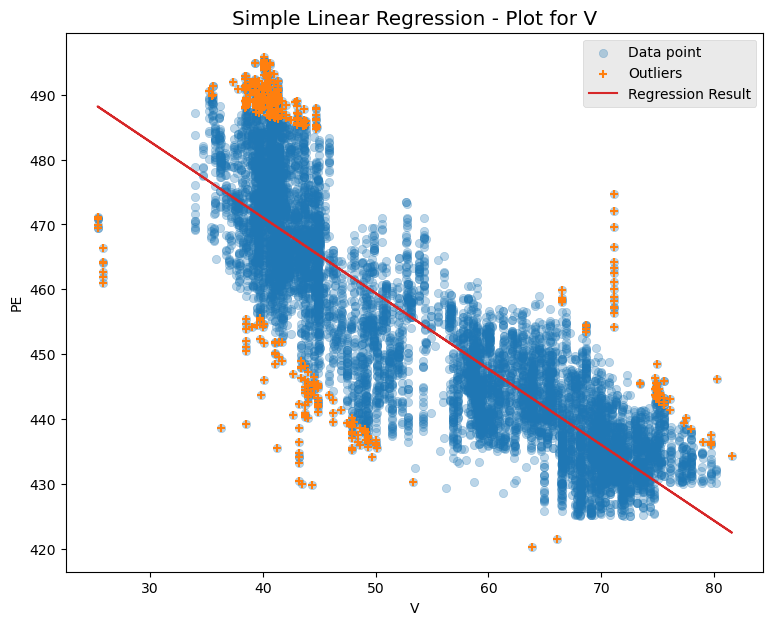


There are 423 outliers
         V      PE
0    39.40  488.56
1    40.07  495.24
2    48.60  436.06
3    43.43  448.06
4    39.33  491.49
..     ...     ...
418  75.23  443.78
419  39.72  455.58
420  44.89  445.45
421  43.77  446.05
422  25.36  470.90

[423 rows x 2 columns]


In [10]:
print("For predictor V")
y = ccpp_df["PE"].to_numpy()
x = ccpp_df["V"].to_numpy()
x_constant = sm.add_constant(x, prepend=False)
lr_model = sm.OLS(y, x_constant).fit()
print(lr_model.summary())
single_regression_coef.append(lr_model.params)
influence = lr_model.get_influence()
cooks_distance = influence.cooks_distance[0]
outlier_indices = np.where(cooks_distance > (4/len(ccpp_df))) #check if larger than threshold

fig, axes = plt.subplots(figsize=(9, 7))
with plt.style.context('ggplot'):
        axes.scatter(x, y, alpha=0.3, label="Data point")
        axes.scatter(x[outlier_indices], y[outlier_indices], marker="+", label="Outliers")
        axes.plot(x, lr_model.predict(x_constant), color="tab:red", label="Regression Result")
        axes.set_title("Simple Linear Regression - Plot for V")
        axes.set_xlabel("V")
        axes.set_ylabel("PE")
        axes.legend()
        plt.show()
 
if(len(outlier_indices[0])>=0):
        print("\nThere are "+str(len(outlier_indices[0]))+" outliers")
else:
        print("\nThere are no outliers")
        
outlier_df_V = pd.DataFrame({'V': x[outlier_indices], 'PE': y[outlier_indices]})
print(outlier_df_V)

For predictor AP
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     3516.
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        23:02:51   Log-Likelihood:                -39224.
No. Observations:                9568   AIC:                         7.845e+04
Df Residuals:                    9566   BIC:                         7.847e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.4899      0.025   

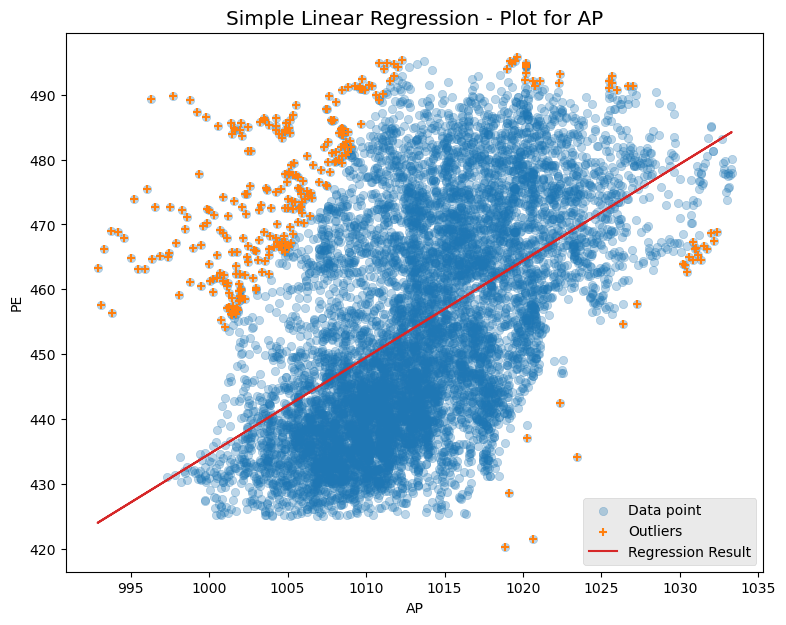


There are 300 outliers
          AP      PE
0    1019.16  495.24
1    1008.52  483.80
2    1010.18  491.49
3    1008.82  481.09
4    1001.24  459.36
..       ...     ...
295  1030.61  464.95
296  1008.43  484.75
297  1005.24  479.22
298   998.27  472.16
299  1003.69  475.34

[300 rows x 2 columns]


In [11]:
print("For predictor AP")
y = ccpp_df["PE"].to_numpy()
x = ccpp_df["AP"].to_numpy()
x_constant = sm.add_constant(x, prepend=False)
lr_model = sm.OLS(y, x_constant).fit()
print(lr_model.summary())
single_regression_coef.append(lr_model.params)
influence = lr_model.get_influence()
cooks_distance = influence.cooks_distance[0]
outlier_indices = np.where(cooks_distance > (4/len(ccpp_df)))

fig, axes = plt.subplots(figsize=(9, 7))
with plt.style.context('ggplot'):
        axes.scatter(x, y, alpha=0.3, label="Data point")
        axes.scatter(x[outlier_indices], y[outlier_indices], marker="+", label="Outliers")
        axes.plot(x, lr_model.predict(x_constant), color="tab:red", label="Regression Result")
        axes.set_title("Simple Linear Regression - Plot for AP")
        axes.set_xlabel("AP")
        axes.set_ylabel("PE")
        axes.legend()
        plt.show()
 
if(len(outlier_indices[0])>=0):
        print("\nThere are "+str(len(outlier_indices[0]))+" outliers")
else:
        print("\nThere are no outliers")
        
outlier_df_AP = pd.DataFrame({'AP': x[outlier_indices], 'PE': y[outlier_indices]})
print(outlier_df_AP)

For predictor RH
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     1714.
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        23:02:52   Log-Likelihood:                -39933.
No. Observations:                9568   AIC:                         7.987e+04
Df Residuals:                    9566   BIC:                         7.988e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4557      0.011   

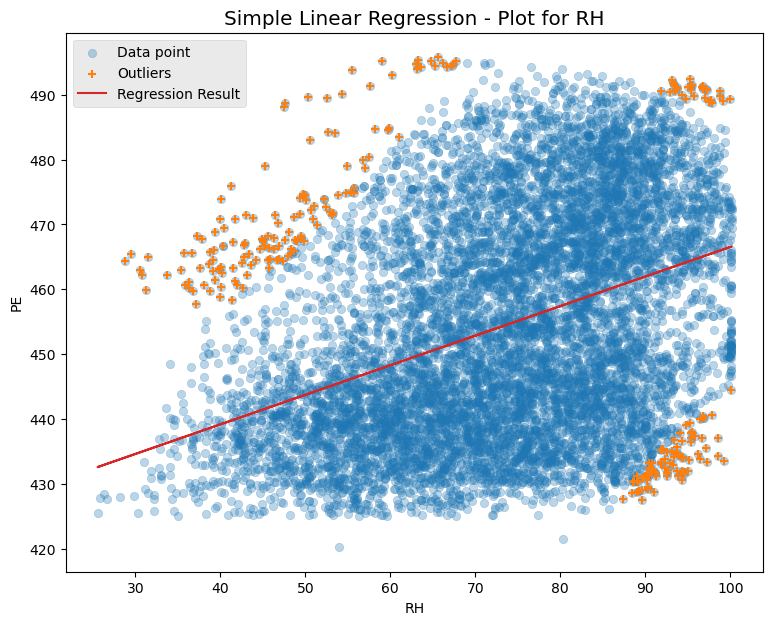


There are 249 outliers
        RH      PE
0    41.25  475.98
1    43.08  462.19
2    48.84  467.54
3    64.77  495.24
4    50.00  474.60
..     ...     ...
244  97.21  490.68
245  98.84  490.50
246  90.20  430.55
247  93.39  434.11
248  99.27  433.62

[249 rows x 2 columns]


In [12]:
print("For predictor RH")
y = ccpp_df["PE"].to_numpy()
x = ccpp_df["RH"].to_numpy()
x_constant = sm.add_constant(x, prepend=False)
lr_model = sm.OLS(y, x_constant).fit()
print(lr_model.summary())
single_regression_coef.append(lr_model.params)
influence = lr_model.get_influence()
cooks_distance = influence.cooks_distance[0]
outlier_indices = np.where(cooks_distance > (4/len(ccpp_df)))

fig, axes = plt.subplots(figsize=(9, 7))
with plt.style.context('ggplot'):
        axes.scatter(x, y, alpha=0.3, label="Data point")
        axes.scatter(x[outlier_indices], y[outlier_indices], marker="+", label="Outliers")
        axes.plot(x, lr_model.predict(x_constant), color="tab:red", label="Regression Result")
        axes.set_title("Simple Linear Regression - Plot for RH")
        axes.set_xlabel("RH")
        axes.set_ylabel("PE")
        axes.legend()
        plt.show()
 
if(len(outlier_indices[0])>=0):
        print("\nThere are "+str(len(outlier_indices[0]))+" outliers")
else:
        print("\nThere are no outliers")
        
outlier_df_RH = pd.DataFrame({'RH': x[outlier_indices], 'PE': y[outlier_indices]})
print(outlier_df_RH)

### Findings

### In each of the above linear regression models, we observe the value of p for all predictors to be lesser than 0.05 (0.00 < 0.05). Hence, there exists a statistically significant association between the predictor and the response in all the four models. 

### It is also evident from the graphs and the analysis shown above that outliers are present in the given data.

### (d) Multiple Regression

#### Fit a multiple regression model to predict the response using all of the predictors. Describe your results. For which predictors can we reject the null hypothesis


In [13]:
train_data = ccpp_df.iloc[:, 0:len(cols) - 1]
train_data = sm.add_constant(train_data.to_numpy(), prepend=False)

model_multiregression = sm.OLS(ccpp_df["PE"].to_numpy(), train_data)
model_multiregression = model_multiregression.fit()

print(model_multiregression.summary())
multi_regression_coef=model_multiregression.params


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        23:02:53   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -1.9775      0.015   -129.342      0.0

In [14]:
cols

Index(['AT', 'V', 'AP', 'RH', 'PE'], dtype='object')

### Findings
### We observe the value of p for all four predictors to be 0 ( lesser than 0.05) . Hence, there exists a statistically significant association between each of the predictors and the response. The null hypothesis can therefore be rejected for all the predictors (since all p values are found to be 0).

### (e) 1c Compare to 1d

#### How do your results from 1c compare to your results from 1d? Create a plot displaying the univariate regression coefficients from 1c on the x-axis, and the multiple regression coefficients from 1d on the y-axis. That is, each predictor is displayed as a single point in the plot. Its coefficient in a simple linear regression model is shown on the x-axis, and its coefficient estimate in the multiple linear regression model is shown on the y-axis.


In [15]:
single_regression_coef


[array([ -2.17131996, 497.03411989]),
 array([ -1.16813513, 517.80152631]),
 array([    1.48987167, -1055.26098898]),
 array([  0.4556501 , 420.96176616])]

In [16]:
multi_regression_coef

array([-1.97751311e+00, -2.33916423e-01,  6.20829438e-02, -1.58054103e-01,
        4.54609274e+02])

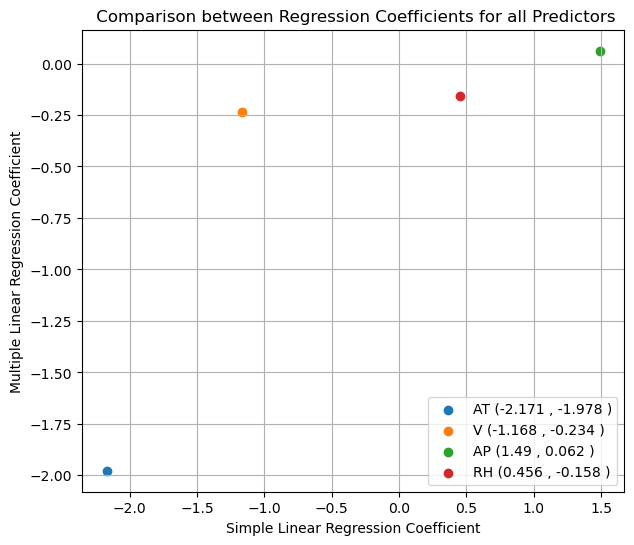

In [17]:

plt.figure(figsize = (7, 6))
for i in range(len(cols)-1):
    plt.scatter(single_regression_coef[i][0], multi_regression_coef[i], label = cols[i]+" ("+ str(np.round(single_regression_coef[i][0],3))+ " , " + str(np.round(multi_regression_coef[i],3))+ " )")
plt.grid()
plt.legend()
plt.xlabel('Simple Linear Regression Coefficient')
plt.ylabel('Multiple Linear Regression Coefficient')
plt.title(' Comparison between Regression Coefficients for all Predictors')
plt.show()

### (f) Nonlinear Association

#### Is there evidence of nonlinear association between any of the predictors and the response? 

In [18]:
print("For Predictor AT")
poly = PolynomialFeatures(degree=3)
y=ccpp_df['PE'].to_numpy()
x=ccpp_df['AT'].to_numpy()
x=x.reshape(-1,1)
x_poly=poly.fit_transform(x)
x_const = sm.add_constant(x_poly)
lr_model = sm.OLS(y,x_const)
lr_model=lr_model.fit()
print(lr_model.summary())

For Predictor AT
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 3.299e+04
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        23:02:53   Log-Likelihood:                -29101.
No. Observations:                9568   AIC:                         5.821e+04
Df Residuals:                    9564   BIC:                         5.824e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        492.7281      0.673   

In [19]:
print("For Predictor V")
poly = PolynomialFeatures(degree=3)
y=ccpp_df['PE'].to_numpy()
x=ccpp_df['V'].to_numpy()
x=x.reshape(-1,1)
x_poly=poly.fit_transform(x)
x_const = sm.add_constant(x_poly)
lr_model = sm.OLS(y,x_const)
lr_model=lr_model.fit()
print(lr_model.summary())

For Predictor V
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                 1.098e+04
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        23:02:53   Log-Likelihood:                -33585.
No. Observations:                9568   AIC:                         6.718e+04
Df Residuals:                    9564   BIC:                         6.721e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        554.1468      9.151    

In [20]:
print("For Predictor AP")
poly = PolynomialFeatures(degree=3)
y=ccpp_df['PE'].to_numpy()
x=ccpp_df['AP'].to_numpy()
x=x.reshape(-1,1)
x_poly=poly.fit_transform(x)
x_const = sm.add_constant(x_poly)
lr_model = sm.OLS(y,x_const)
lr_model=lr_model.fit()
print(lr_model.summary())

For Predictor AP
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     1813.
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        23:02:53   Log-Likelihood:                -39184.
No. Observations:                9568   AIC:                         7.837e+04
Df Residuals:                    9565   BIC:                         7.840e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0747      0.009   

In [21]:
print("For Predictor RH")
poly = PolynomialFeatures(degree=3)
y=ccpp_df['PE'].to_numpy()
x=ccpp_df['RH'].to_numpy()
x=x.reshape(-1,1)
x_poly=poly.fit_transform(x)
x_const = sm.add_constant(x_poly)
lr_model = sm.OLS(y,x_const)
lr_model=lr_model.fit()
print(lr_model.summary())

For Predictor RH
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     579.2
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        23:02:53   Log-Likelihood:                -39923.
No. Observations:                9568   AIC:                         7.985e+04
Df Residuals:                    9564   BIC:                         7.988e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        468.4135     10.545   

#### From the above results, we can observe that the values of p are very small for $x^2$ (quadratic) and $x^3$ (cubic) terms of the predictors AT, AP and RH (< 0.05).  Hence, we can reject the null hypothesis and say that there is evidence of non-linear association between the predictors AT, AP and RH and the response. The p-value for $V^2$ is considerably high (greater than 0.05) but the p-value for $V^3$ is small (lesser than 0.05). A significant p-value for the cubic term suggests a more complex, non-linear relationship, while the non-significant p-value for the quadratic term indicates that a simple quadratic relationship is not supported. The highest order term in our polynomial linear regression model for predictor V is cubic and the cubic term's p-value is lesser than 0.05. As a result, we can reject the null hypothesis and say that there is evidence of non-linear association between V and the response.

### (g) Interactions of Predictors

#### Is there evidence of association of interactions of predictors with the response? To answer this question, run a full linear regression model with all pairwise interaction terms and state whether any interaction terms are statistically significant.

In [22]:
lr_model_pairwise_interactions = smf.ols(formula='PE ~ AT + V + AP + RH + AT*V + AT*AP + AT*RH + V*AP + V*RH + AP*RH', data=ccpp_df)
lr_model_pairwise_interactions = lr_model_pairwise_interactions.fit()
print(lr_model_pairwise_interactions.summary())

#AT*V + AT*AP + AT*RH + V*AP + V*RH + AP*RH are the pairwise interaction terms
                            

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        23:02:53   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    685.7825     78.640      8.721      0.0

### Findings

### Statistical Significance Condition : p < 0.01

### Statistically significant terms are V, AT:V , AT:RH, V:AP

### Statistical Significance Condition : p < 0.05

### Statistically significant terms are V , AP, RH , AT:V , AT:RH, V:AP, AP:RH 

### Statistical Significance Condition : p < 0.10

### Statistically significant terms are V , AP,  RH , AT,  AT:V , AT:RH, V:AP, AP:RH, V:RH  


### Note : The interaction term between AT and AP (AT:AP) has an extremely large p-value of 0.452 and is hence,statistically insignificant in all the conditions

### If we take the condition to be p<0.05, the statistically significant pairwise interaction terms are AT:V , AT:RH, V:AP, AP:RH 

### (h) Improvement

In [23]:
ccpp_df.shape

(9568, 5)

In [24]:
0.7*9568

6697.599999999999

In [25]:
X=ccpp_df.iloc[:,0:4].to_numpy()
Y=ccpp_df.iloc[:,-1].to_numpy()

In [26]:
train_x_70, test_x_30, train_y_70, test_y_30 = train_test_split(X, Y, train_size=0.70, random_state=1)

In [27]:
combined_data = np.column_stack((train_x_70, train_y_70))
train_70_df=pd.DataFrame(combined_data,columns=cols)
train_x_70=train_70_df.iloc[:,0:4]
train_y_70=train_70_df.iloc[:,-1]

In [28]:
combined_data_test = np.column_stack((test_x_30, test_y_30))
test_30_df=pd.DataFrame(combined_data_test,columns=cols)
test_x_30=test_30_df.iloc[:,0:4]
test_y_30=test_30_df.iloc[:,-1]

###  Training a regression model on a randomly selected 70% subset of the data with all predictors AT, V, AP, RH

In [29]:
lr_model_70 = smf.ols(formula='PE ~ AT + V + AP + RH', data=train_70_df)
lr_model_70=lr_model_70.fit()
print(lr_model_70.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                 2.167e+04
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        23:02:53   Log-Likelihood:                -19660.
No. Observations:                6697   AIC:                         3.933e+04
Df Residuals:                    6692   BIC:                         3.936e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    458.3988     11.562     39.649      0.0

In [30]:
train_70_predictions = lr_model_70.predict(train_x_70)
train_70_mse = mean_squared_error(train_y_70, train_70_predictions)
print(train_70_mse) #Train MSE

20.766119761450934


In [31]:
test_30_predictions = lr_model_70.predict(test_x_30)
test_30_mse = mean_squared_error(test_y_30, test_30_predictions)
print(test_30_mse) #Test MSE

20.777478106883937


In [32]:
print("Formula : PE ~ AT + V + AP + RH")
print("Train MSE : "+ str(train_70_mse))
print("Test MSE : "+ str(test_30_mse))

Formula : PE ~ AT + V + AP + RH
Train MSE : 20.766119761450934
Test MSE : 20.777478106883937


The regression model trained using all predictors has an R-squared value of 0.928 which denotes a good fit. The predictors (AT, V, AP, and RH) have very small p-values and are statistically significant. We can say that there is a significant linear association between the predictors and the response. 

###  train a regression model with all possible interaction terms and quadratic nonlinearities

In [33]:
# all possible interaction terms and quadratic nonlinearities
lr_model_all_70 = smf.ols(formula='PE ~ AT + V + AP + RH + np.power(AT,2) + np.power(V,2) + np.power(AP,2) + np.power(RH,2) + AT*V + AT*AP + AT*RH + V*AP + V*RH + AP*RH', data=train_70_df)
lr_model_all_70=lr_model_all_70.fit()
print(lr_model_all_70.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     7181.
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        23:02:54   Log-Likelihood:                -19192.
No. Observations:                6697   AIC:                         3.841e+04
Df Residuals:                    6682   BIC:                         3.852e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -8171.8080   1416.708     

In [34]:
train_all_70_predictions = lr_model_all_70.predict(train_x_70)
train_all_70_mse = mean_squared_error(train_y_70, train_all_70_predictions)
print(train_all_70_mse) #Train MSE

18.05988672391413


In [35]:
test_all_30_predictions = lr_model_all_70.predict(test_x_30)
test_all_30_mse = mean_squared_error(test_y_30, test_all_30_predictions)
print(test_all_30_mse) #Test MSE

18.217100508743414


In [36]:
print("all possible interaction terms and quadratic nonlinearities")
print("Formula : PE ~ AT + V + AP + RH + np.power(AT,2) + np.power(V,2) + np.power(AP,2) + np.power(RH,2) + AT*V + AT*AP + AT*RH + V*AP + V*RH + AP*RH")
print("Train MSE : "+ str(train_all_70_mse))
print("Test MSE : "+ str(test_all_30_mse))

all possible interaction terms and quadratic nonlinearities
Formula : PE ~ AT + V + AP + RH + np.power(AT,2) + np.power(V,2) + np.power(AP,2) + np.power(RH,2) + AT*V + AT*AP + AT*RH + V*AP + V*RH + AP*RH
Train MSE : 18.05988672391413
Test MSE : 18.217100508743414


### From the above results, we observe that for the terms np.power(V,2), AT * AP, V * AP, V * RH, p value is greater than 0.05. Hence, these terms are not statistically significant and removed from the formula in the subsequent section. Note: Despite having high p values, the base predictors V, AT are still considered as discarding them and including the interaction term between AT and V,  will cause the hierarchy principle to fail

In [37]:
# removing insignificant variables based on p-values (AT*AP,V*AP,V*RH,np.power(V,2))
lr_model_removed_70 = smf.ols(formula='PE ~ AT + V + AP + RH + np.power(AT,2)  + np.power(AP,2) + np.power(RH,2) + AT*V  + AT*RH  + AP*RH ', data=train_70_df)
lr_model_removed_70=lr_model_removed_70.fit()
print(lr_model_removed_70.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                 1.004e+04
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        23:02:54   Log-Likelihood:                -19198.
No. Observations:                6697   AIC:                         3.842e+04
Df Residuals:                    6686   BIC:                         3.849e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -1.052e+04   1079.936     

In [38]:
train_removed_70_predictions = lr_model_removed_70.predict(train_x_70)
train_removed_70_mse = mean_squared_error(train_y_70, train_removed_70_predictions)
print(train_removed_70_mse)

18.093235651113112


In [39]:
test_removed_30_predictions = lr_model_removed_70.predict(test_x_30)
test_removed_30_mse = mean_squared_error(test_y_30, test_removed_30_predictions)
print(test_removed_30_mse)

18.263588112294766


In [40]:
print("removing insignificant variables based on p-values (AT*AP,V*AP,V*RH,np.power(V,2))")
print("Formula : PE ~ AT + V + AP + RH + np.power(AT,2)  + np.power(AP,2) + np.power(RH,2) + AT*V  + AT*RH  + AP*RH")
print("Train MSE : "+ str(train_removed_70_mse))
print("Test MSE : "+ str(test_removed_30_mse))

removing insignificant variables based on p-values (AT*AP,V*AP,V*RH,np.power(V,2))
Formula : PE ~ AT + V + AP + RH + np.power(AT,2)  + np.power(AP,2) + np.power(RH,2) + AT*V  + AT*RH  + AP*RH
Train MSE : 18.093235651113112
Test MSE : 18.263588112294766


### (i) KNN

### Raw Features


In [41]:
#dataset 70-30
#raw features
#k - 1,2,3...100
k_values=np.arange(1,101,1)
k_values
k_values_inv=[]
for k in k_values:
  k_values_inv.append(1/k)
k_values_inv

train_x_raw=train_x_70
train_y=train_y_70

test_x_raw=test_x_30
test_y=test_y_30

In [42]:
train_mse_raw_knn=[]
test_mse_raw_knn=[]
for k in k_values:
    knn_model = KNeighborsRegressor(n_neighbors=k)
    knn_model.fit(train_x_raw, train_y)
    train_raw_pred = knn_model.predict(train_x_raw)
    train_mse = mean_squared_error(train_y, train_raw_pred)
    train_mse_raw_knn.append(train_mse)
    test_raw_pred = knn_model.predict(test_x_raw)
    test_mse = mean_squared_error(test_y, test_raw_pred)
    test_mse_raw_knn.append(test_mse)

In [43]:
lowest_test_mse_raw_knn=min(test_mse_raw_knn)
opt_k=k_values[test_mse_raw_knn.index(lowest_test_mse_raw_knn)]
corres_train_mse_raw_knn=train_mse_raw_knn[test_mse_raw_knn.index(lowest_test_mse_raw_knn)]

In [44]:
lowest_test_mse_raw_knn

15.704821203761764

In [45]:
opt_k

5

In [46]:
corres_train_mse_raw_knn


10.552961493205913

In [47]:
print("KNN Regression with Raw Features")
print("Optimal K : "+str(opt_k))
print("Test MSE : "+str(lowest_test_mse_raw_knn))
print("Train MSE : "+str(corres_train_mse_raw_knn))

KNN Regression with Raw Features
Optimal K : 5
Test MSE : 15.704821203761764
Train MSE : 10.552961493205913


KNN Regression - Raw Features


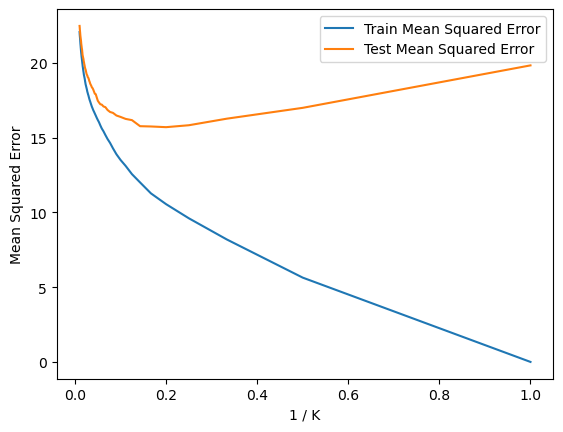

In [48]:
print("KNN Regression - Raw Features")
plt.plot(k_values_inv,train_mse_raw_knn , label="Train Mean Squared Error")
plt.plot(k_values_inv, test_mse_raw_knn, label="Test Mean Squared Error")
plt.xlabel('1 / K')
plt.ylabel('Mean Squared Error')
plt.legend(loc='best')
plt.show()

### Normalized Features

In [49]:
#dataset 70-30
#normalized features
#k - 1,2,3...100
#MinMaxScaler()
    
train_x_normalized=MinMaxScaler().fit_transform(train_x_70)
train_y=train_y_70

test_x_normalized=MinMaxScaler().fit_transform(test_x_30)
test_y=test_y_30


In [50]:
train_mse_normalized_knn=[]
test_mse_normalized_knn=[]
for k in k_values:
    knn_model = KNeighborsRegressor(n_neighbors=k)
    knn_model.fit(train_x_normalized, train_y)
    train_normalized_pred = knn_model.predict(train_x_normalized)
    train_mse = mean_squared_error(train_y, train_normalized_pred)
    train_mse_normalized_knn.append(train_mse)
    test_normalized_pred = knn_model.predict(test_x_normalized)
    test_mse = mean_squared_error(test_y, test_normalized_pred)
    test_mse_normalized_knn.append(test_mse)

In [51]:
lowest_test_mse_normalized_knn=min(test_mse_normalized_knn)
opt_k_normalized=k_values[test_mse_normalized_knn.index(lowest_test_mse_normalized_knn)]
corres_train_mse_normalized_knn=train_mse_normalized_knn[test_mse_normalized_knn.index(lowest_test_mse_normalized_knn)]
print(lowest_test_mse_normalized_knn)
print(opt_k_normalized)
print(corres_train_mse_normalized_knn)

14.910644795598495
7
11.011891696556182


In [52]:
print("KNN Regression with Normalized Features")
print("Optimal K : "+str(opt_k_normalized))
print("Test MSE : "+str(lowest_test_mse_normalized_knn))
print("Train MSE : "+str(corres_train_mse_normalized_knn))

KNN Regression with Normalized Features
Optimal K : 7
Test MSE : 14.910644795598495
Train MSE : 11.011891696556182


KNN Regression - Normalized Features


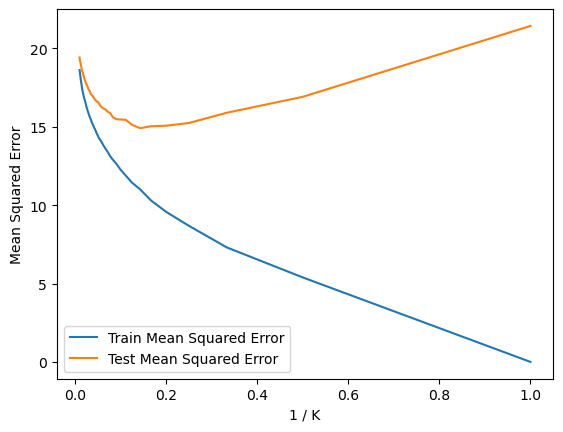

In [53]:
print("KNN Regression - Normalized Features")
plt.plot(k_values_inv,train_mse_normalized_knn , label="Train Mean Squared Error")
plt.plot(k_values_inv, test_mse_normalized_knn, label="Test Mean Squared Error")
plt.xlabel('1 / K')
plt.ylabel('Mean Squared Error')
plt.legend(loc='best')
plt.show()

### (j ) Compare KNN and Linear Regression

#### Compare the results of KNN Regression with the linear regression model that has the smallest test error and provide your analysis

In [54]:
test_errors=[["Linear Regression with all predictors" , np.round([train_70_mse],4),np.round([test_30_mse],4)] , ["Linear Regression with all possible interaction terms and quadratic non-linearities",np.round([train_all_70_mse],4),np.round([test_all_30_mse],4)] ,["Linear Regression after removing insignificant variables based on p-values" ,np.round([train_removed_70_mse],4), np.round([test_removed_30_mse],4)] , ["k-nearest neighbor regression using raw features (no normalization)",np.round(corres_train_mse_raw_knn,4), np.round(lowest_test_mse_raw_knn,4) ],["k-nearest neighbor regression using normalized features", np.round(corres_train_mse_normalized_knn,4),np.round(lowest_test_mse_normalized_knn,4)]]
myheaders=["Model","Train Error","Test Error"]
print(tabulate(test_errors, headers=myheaders, tablefmt='grid',showindex=False))

+-------------------------------------------------------------------------------------+---------------+--------------+
| Model                                                                               |   Train Error |   Test Error |
+=====================================================================================+===============+==============+
| Linear Regression with all predictors                                               |       20.7661 |      20.7775 |
+-------------------------------------------------------------------------------------+---------------+--------------+
| Linear Regression with all possible interaction terms and quadratic non-linearities |       18.0599 |      18.2171 |
+-------------------------------------------------------------------------------------+---------------+--------------+
| Linear Regression after removing insignificant variables based on p-values          |       18.0932 |      18.2636 |
+-----------------------------------------------

### Findings

### From the above table, we can see that the lowest test mean squared error obtained with Linear Regression is 18.2171 while the lowest test mean squared error obtained with KNN Regression is 14.9106. This shows that KNN Regression performs better than Linear Regression. The reason for KNN Regression performing better could be the non-linear nature of the data (KNN Regression handles non-linear data better than Linear Regression)

## 2. ISLR: 2.4.1 

### For each of parts (a) through (d), indicate whether we would generall expect the performance of a flexible statistical learning method to be better or worse than an inflexible method. Justify your answer.

### (a) The sample size n is extremely large, and the number of predictors p is small.

When we have a huge dataset (that is, a large number of observations) and a small number of predictors, a flexible statistical learning method is bound to perform better than an inflexible method. This is because the availability of an extremely large sample size helps overcome the problem of overfitting (which is common amongst flexible methods) and model complex relationships between the predictors and the output variable, even though the number of predictors is small. 

### (b) The number of predictors p is extremely large, and the number of observations n is small.

When we have a small dataset (that is, a small number of observations) and an extremely large number of predictors, a flexible statistical learning method is bound to perform worse than an inflexible method. This is because we do not have sufficient number of observations for the flexible method to learn from and accurately model the complex relationships between the large number of predictors and the response variable. In such cases, a flexible method is more prone to overfitting and extracting erroneous relationships between the predictors and the response variable than an inflexible method.

### (c) The relationship between the predictors and response is highly non-linear.

When the relationship between the predictors and the response variable is highly non-linear, a flexible statistical learning method is bound to perform better than an inflexible method. This is because flexible methods do not make assumptions regarding the data's underlying probability distribution and are more equipped to capture complex, non-linear relationships between the predictors and the response, than inflexible methods.

### (d) The variance of the error terms, i.e. $σ^2$ = Var(ε), is extremely high.

When the variance of the error terms, i.e.  $σ^2$ = Var(ε), is extremely high., a flexible statistical learning method is bound to perform worse than an inflexible method. This is because high variance of the error terms indicates that the data is extremely noisy. Flexible methods are usually more susceptible to noisy data and thereby, more prone to overfitting and extracting erroneous relationships between the predictors and the response variable than an inflexible method. 

## 3. ISLR: 2.4.7

### (a) Compute the Euclidean distance between each observation and the test point, X1 = X2 = X3 = 0.

| Observation| X1           |X2|X3|Y|
| -- | -- |-- |--|--|
| 1 | 0 | 3 | 0 | Red |
| 2 | 2 | 0 | 0 | Red |
| 3 | 0 | 1 | 3 | Red |
| 4 | 0 | 1 | 2 | Green |
| 5 | -1 | 0 | 1 | Green |
| 6 | 1 | 1 | 1 | Red |

In [55]:
observations = [[0,3,0], [2,0,0], [0,1,3], [0,1,2], [-1,0,1], [1,1,1]]
test_point = [[0,0,0]]
print("Euclidean Distances between each observation and the test point")
ed=euclidean_distances(observations, test_point)
ed

Euclidean Distances between each observation and the test point


array([[3.        ],
       [2.        ],
       [3.16227766],
       [2.23606798],
       [1.41421356],
       [1.73205081]])

In [56]:
euc_dict={"Observation": [1,2,3,4,5,6], "Euclidean Distance between observation and test point" : list(ed.reshape(-1)) }
euc_df=pd.DataFrame(euc_dict)
euc_df

,Observation,Euclidean Distance between observation and test point
0,1,3.000000
1,2,2.000000
2,3,3.162278
3,4,2.236068
4,5,1.414214
5,6,1.732051


Euclidean Distance between two points,p and q, in a n-dimensional space = $ d\left( p,q\right)   = \sqrt {\sum _{i=1}^{n}  \left( q_{i}-p_{i}\right)^2 } $

observation 1 and test point = $\sqrt{(3-0)^2 + (0-0)^2 + (0-0)^2}$ = 3

observation 2 and test point = $\sqrt{(2-0)^2 + (0-0)^2 + (0-0)^2}$ = 2

observation 3 and test point = $\sqrt{(3-0)^2 + (1-0)^2 + (0-0)^2}$ = 3.16

observation 4 and test point = $\sqrt{(2-0)^2 + (1-0)^2 + (0-0)^2}$ = 2.2

observation 5 and test point = $\sqrt{(1-0)^2 + (-1-0)^2 + (0-0)^2}$ = 1.41

observation 6 and test point = $\sqrt{(1-0)^2 + (1-0)^2 + (1-0)^2}$ = 1.73

### (b) What is our prediction with K = 1? Why?

For k=1, our prediction would be Green (Observation 5). This is because the closest neighbouring observation to the test point (since, k=1) is observation  5, which corresponds to the colour green. 

### (c) What is our prediction with K = 3? Why?

For k=3,our prediction would be Red. The three nearest neighbouring points to the test point are observations 5, 6 and 2. Among these, observations 6 and 2 are red while observation 5 is green. Based on majority, we pick the colour red.

### (d) If the Bayes decision boundary in this problem is highly non-linear, then would we expect the best value for K to be large or small? Why?

If we have a highly non-linear decision boundary, we would expect the best value of K to be small. This is because a smaller K means greater flexibility. As the value of K becomes large, flexibility decreases and a more linear boundary is obtained. In our case, we are given a highly non-linear boundary and hence, a smaller K would perform better.